In [33]:
import networkx as nx
import pandas as pd
from pandas import DataFrame
from pandas import Series
from collections import OrderedDict
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import math
import scipy
import scipy.stats
from textblob import Blobber
from textblob.tokenizers import WordTokenizer
from nltk.corpus import stopwords
from textblob import Word
from textblob.base import BaseTokenizer
from textblob import TextBlob

Populating the interactive namespace from numpy and matplotlib


# Task A

In [2]:
sentiment = pd.read_csv("Assignment 3 Sentiment Scores.csv")
#sentiment = pd.read_csv("outputv3.csv")
#sentiment = sentiment.multiply(5)
#sentiment = sentiment.iloc[:,1:11]

In [3]:
sentiment.head(2)

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4,3,NaN,NaN,NaN,5,2,1
1,NaN,NaN,3,2,2,2,2,2,NaN,NaN


In [4]:
models = list(sentiment.columns)

In [5]:
for col1 in xrange(0,10):
    for col2 in xrange(col1,10):
        if col1 != col2:
            sentiment[models[col1] + '-' + models[col2]] = sentiment.ix[:,col1] - sentiment.ix[:,col2]

In [6]:
comparisons = sentiment.ix[:,10:]

In [7]:
#edges = OrderedDict()
#for col in comparisons:
#    model_col = comparisons[col]
#    edges[col] = model_col[model_col > 0].mean(), abs(model_col[model_col < 0].mean())

In [8]:
comparisons.head(2)

,ES-LS,ES-RX,ES-A8,ES-A6,ES-3series,ES-5series,ES-7series,ES-XJ,ES-Sclass,LS-RX,...,3series-5series,3series-7series,3series-XJ,3series-Sclass,5series-7series,5series-XJ,5series-Sclass,7series-XJ,7series-Sclass,XJ-Sclass
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [9]:
mean_sentiment = DataFrame(index = comparisons.columns)
for col in comparisons.columns:
    model_col = comparisons[col]
    mean_sentiment.ix[col,'Positive'] = model_col[model_col > 0].mean()
    mean_sentiment.ix[col,'Negative'] = model_col[model_col < 0].mean()

In [10]:
PCN = nx.DiGraph()

In [11]:
# unweighted

for col1 in xrange(0,10):
    for col2 in xrange(col1,10):
        if col1 != col2:
            model1 = models[col1]
            model2 = models[col2]
            if ~np.isnan(mean_sentiment.ix[model1 + '-' + model2, 'Positive']):
                PCN.add_edge(model1, model2)
            if ~np.isnan(mean_sentiment.ix[model1 + '-' + model2, 'Negative']):
                PCN.add_edge(model2, model1)

{'3series': <matplotlib.text.Text at 0x16e79160>,
 '5series': <matplotlib.text.Text at 0x16e798d0>,
 '7series': <matplotlib.text.Text at 0x16e18e48>,
 'A6': <matplotlib.text.Text at 0x16e6d9b0>,
 'A8': <matplotlib.text.Text at 0x16e6dd68>,
 'ES': <matplotlib.text.Text at 0x16e79518>,
 'LS': <matplotlib.text.Text at 0x16e6d5f8>,
 'RX': <matplotlib.text.Text at 0x16e6d240>,
 'Sclass': <matplotlib.text.Text at 0x16e18a90>,
 'XJ': <matplotlib.text.Text at 0x16e18630>}

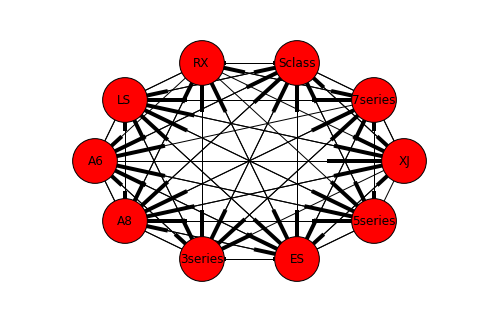

In [12]:
pos = nx.circular_layout(PCN)
nx.draw(PCN,pos,node_size=2000)
nx.draw_networkx_labels(PCN,pos)

In [13]:
# unweighted

#for col1 in xrange(0,10):
#    for col2 in xrange(col1,10):
#        if col1 != col2:
#            model1 = models[col1]
#            model2 = models[col2]
#            if ~np.isnan(edges[model1 + '-' + model2][0]):
#                PCN.add_edge(model1, model2)
#            if ~np.isnan(edges[model1 + '-' + model2][1]):
#                PCN.add_edge(model2, model1)

In [14]:
w_PCN = nx.DiGraph()

In [15]:
# weighted

for col1 in xrange(0,10):
    for col2 in xrange(col1,10):
        if col1 != col2:
            model1 = models[col1]
            model2 = models[col2]
            if ~np.isnan(mean_sentiment.ix[model1 + '-' + model2, 'Positive']):
                w_PCN.add_weighted_edges_from([(model1, model2, mean_sentiment.ix[model1 + '-' + model2, 'Positive'])])
            if ~np.isnan(mean_sentiment.ix[model1 + '-' + model2, 'Negative']):
                w_PCN.add_weighted_edges_from([(model2, model1, abs(mean_sentiment.ix[model1 + '-' + model2, 'Negative']))])

In [16]:
unweighted_PR = nx.pagerank(PCN, alpha = 0.5, max_iter=100)
weighted_PR = nx.pagerank(w_PCN, alpha = 0.5, weight = 'weight')

# Task B

In [17]:
sales_dict = {'A6':20000, 'A8':12000, '3series':220000, '5series':60000, '7series':14000, 'XJ':6600, 'ES':135000, 'LS':30000, 'RX':120000, 'Sclass':25000}

sales = pd.DataFrame(sales_dict.values(), index=sales_dict.keys())
sales.columns = ['Sales']
sales = sales.sort()

In [18]:
sales['unweighted_PR'] = unweighted_PR.values()

In [19]:
sales['weighted_PR'] = weighted_PR.values()

In [20]:
sales['Sales'].corr(sales['unweighted_PR'], method='spearman')

-0.12309149097933274

In [21]:
sales['Sales'].corr(sales['weighted_PR'], method='spearman')

0.29696969696969699

In [22]:
sales

,Sales,unweighted_PR,weighted_PR
3series,220000,0.091206,0.082186
5series,60000,0.106905,0.100378
7series,14000,0.100189,0.104794
A6,20000,0.086303,0.076910
A8,12000,0.106905,0.098633
ES,135000,0.099241,0.111704
LS,30000,0.106905,0.112458
RX,120000,0.097721,0.107050
Sclass,25000,0.106905,0.105753
XJ,6600,0.097721,0.100135


# Task C

In [25]:
reviews = pd.read_csv("Assignment 3 Edmunds Posts.csv", usecols=[0])

In [30]:
reviews.head(2)

,Posts
0,"""As a Mercedes fan, I was sad, but I knew that..."
1,"""By the way the new GS, next lsand new $150K s..."


In [28]:
tb = Blobber(tokenizer=WordTokenizer())

In [29]:
def tokenize (x):
    return list(tb(str(x)).tokenize())

In [32]:
reviews['tokens'] = reviews['Posts'].apply(tokenize)

In [34]:
sw = stopwords.words('english')
sw.remove('not')

In [41]:
def parse (string):
    global sw
    tokens = list(TextBlob(str(string)).words)
    no_stop = [word for word in tokens if word.isalpha() and word.lower() not in sw]
    lemmaed = [Word(w).lemmatize() for w in no_stop]
    lowercase = [word.lower() for word in lemmaed]
    return lowercase

In [43]:
reviews['tokens_clean'] = reviews['Posts'].apply(parse)

In [45]:
models = ["es", "ls", "rx", "a8", "a6", "3series", "5series", "7series", "xj", "sclass"]

In [46]:
models = [" es ", " ls ", " rx ", " a8 ", " a6 ", " 3series ", " 5series ", " 7series ", " xj ", " sclass "]

In [50]:
def token_extractor (tokens, models, num_words):
    token_list = []
    for i in xrange(len(tokens)):
        if tokens[i] in models:
            token_list.append(tokens[i-num_words:i+1+num_words])
    return token_list

In [51]:
reviews['model_tokens'] = reviews['tokens_clean'].apply(lambda x: token_extractor(x, models, 2))

In [53]:
reviews.head(10)

,Posts,tokens,tokens_clean,model_tokens
0,"""As a Mercedes fan, I was sad, but I knew that...","[``, As, a, Mercedes, fan, ,, I, was, sad, ,, ...","[mercedes, fan, sad, knew, not, typical, situa...",[]
1,"""By the way the new GS, next lsand new $150K s...","[``, By, the, way, the, new, GS, ,, next, lsan...","[way, new, gs, next, lsand, new, sport, car, i...",[]
2,"""Come now, does anyone really believe that wha...","[``, Come, now, ,, does, anyone, really, belie...","[come, anyone, really, believe, whatever, pric...",[]
3,"The success of the LexusES does prove that, at...","[The, success, of, the, LexusES, does, prove, ...","[success, lexuses, prove, least, us, market, l...",[]
4,Which still didn't amount to beating their com...,"[Which, still, did, n't, amount, to, beating, ...","[still, amount, beating, competitor, bmw, merc...",[]
5,..but I wonder how many employees are secure e...,"[..but, I, wonder, how, many, employees, are, ...","[wonder, many, employee, secure, enough, take,...",[]
6,"""Do you think that if Mercedes went back to th...","[``, Do, you, think, that, if, Mercedes, went,...","[think, mercedes, went, back, former, style, l...",[]
7,"""How 'bout Jaguar, Phaeton, Acura, Ferrari, AM...","[``, How, 'bout, Jaguar, ,, Phaeton, ,, Acura,...","[jaguar, phaeton, acura, ferrari, etc, favorit...",[]
8,"""I don't understand what Audi is going to do y...","[``, I, do, n't, understand, what, Audi, is, g...","[understand, audi, going, yet, prior, release,...",[]
9,"""I'll bet most critics of an LexusLS have neve...","[``, I, 'll, bet, most, critics, of, an, Lexus...","[bet, critic, lexusls, never, sat, behind, whe...",[]
